<h2>Complete Statistics Implementation</h2>

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

<h3>01. Exploratory Data Analysis (EDA)</h3>

In [2]:
# read the dataset
sales_data = pd.read_csv("archive/Sales_Data.csv")

In [3]:
# check the dimensions
sales_data.shape

(185950, 10)

In [4]:
# let's have look at the data
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
# check datatypes
sales_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [6]:
# descriptive statistics
sales_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,185950.0,NaN,NaN,NaN,230417.569379,51512.73711,141234.0,185831.25,230367.5,275035.75,319670.0
Product,185950,19,USB-C Charging Cable,21903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Ordered,185950.0,NaN,NaN,NaN,1.124383,0.442793,1.0,1.0,1.0,1.0,9.0
Price Each,185950.0,NaN,NaN,NaN,184.399735,332.73133,2.99,11.95,14.95,150.0,1700.0
Order Date,185950,142395,12/15/2019 20:16,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Address,185950,140787,"193 Forest St, San Francisco, CA 94016",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,185950.0,NaN,NaN,NaN,7.05914,3.502996,1.0,4.0,7.0,10.0,12.0
Sales,185950.0,NaN,NaN,NaN,185.490917,332.919771,2.99,11.95,14.95,150.0,3400.0
City,185950,9,San Francisco,44732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,185950.0,NaN,NaN,NaN,14.413305,5.423416,0.0,11.0,15.0,19.0,23.0


In [7]:
# concise information
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [8]:
# let's extract day and day_name from Order Date column. We don't have to extract year as there are records for 2019 and 2020 only with 34
# records for year 2020
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [9]:
sales_data['Day'] = sales_data['Order Date'].dt.day
sales_data['Day_Name'] = sales_data['Order Date'].dt.day_name()
sales_data['Month_Name'] = sales_data['Order Date'].dt.month_name()

In [10]:
# extract zipcode from address
sales_data['ZipCode'] = sales_data['Purchase Address'].str[-5:]

In [11]:
# let's check for null/ missing records
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Day                 0
Day_Name            0
Month_Name          0
ZipCode             0
dtype: int64

In [12]:
# duplicate records
sales_data.duplicated().sum()

264

In [13]:
# drop duplicates
sales_data.drop_duplicates(inplace=True)

In [14]:
sales_data.duplicated().sum()

0

In [15]:
# check columns
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Day', 'Day_Name',
       'Month_Name', 'ZipCode'],
      dtype='object')

In [16]:
# create a copy of data with re-arranging columns for ease of understanding
final_data = sales_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'City', 'ZipCode', 
                         'Month_Name', 'Day', 'Day_Name', 'Hour']]

In [17]:

final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,City,ZipCode,Month_Name,Day,Day_Name,Hour
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,New York City,10001,December,30,Monday,0
1,295666,LG Washing Machine,1,600.00,600.00,New York City,10001,December,29,Sunday,7
2,295667,USB-C Charging Cable,1,11.95,11.95,New York City,10001,December,12,Thursday,18
3,295668,27in FHD Monitor,1,149.99,149.99,San Francisco,94016,December,22,Sunday,15
4,295669,USB-C Charging Cable,1,11.95,11.95,Atlanta,30301,December,18,Wednesday,12


In [18]:
# save final data to a csv file
# final_data.to_csv("archive/final_sales_data.csv", index=False)

In [19]:
# now let's import our final data for further analysis
data = pd.read_csv("archive/final_sales_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,City,ZipCode,Month_Name,Day,Day_Name,Hour
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,New York City,10001,December,30,Monday,0
1,295666,LG Washing Machine,1,600.00,600.00,New York City,10001,December,29,Sunday,7
2,295667,USB-C Charging Cable,1,11.95,11.95,New York City,10001,December,12,Thursday,18
3,295668,27in FHD Monitor,1,149.99,149.99,San Francisco,94016,December,22,Sunday,15
4,295669,USB-C Charging Cable,1,11.95,11.95,Atlanta,30301,December,18,Wednesday,12


<h3>Univariate Analysis:</h3>

In [20]:
# which product is ordered most?
data['Product'].value_counts().sort_values(ascending=False)

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [21]:
# what is the maximum count of quantity of product bought ?
data['Quantity Ordered'].value_counts().sort_values(ascending=False)

1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

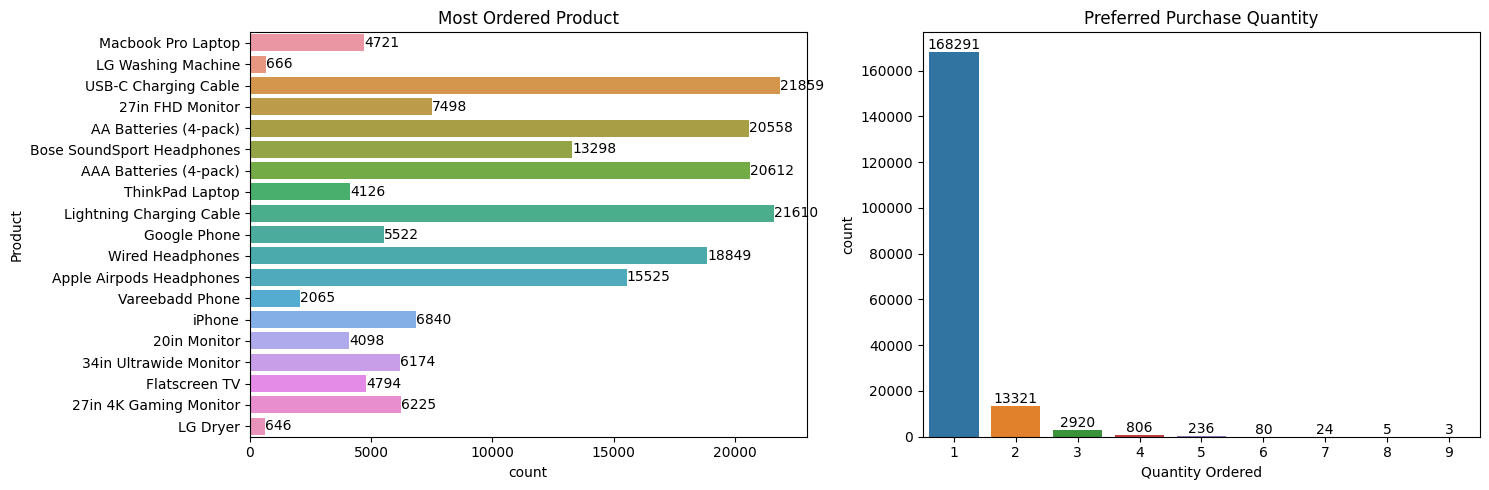

In [22]:
plt.figure(figsize=(15,5))

# Most Ordered Product
ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(data=data, y='Product', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title("Most Ordered Product")

# Preferred Purchase Quantity
ax2 = plt.subplot2grid((1,2),(0,1))

sns.countplot(data=data, x='Quantity Ordered', ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title("Preferred Purchase Quantity")

plt.tight_layout()
plt.show()

From above countplots we observed that:
 - Top 3 most ordered products - USB-C Charging Cable (21859), Lightning Charging Cable (21610) and AAA Batteries (4-pack) (20612).
 - Bottom 3 least ordered products - LG Dryer (646), LG Washing Machine (666) and Vareebadd Phone (2065).
 - Customers prefer purchasing 1 quantity of items from the products.

In [23]:
# which city has shown maximum number of orders?
data['City'].value_counts().sort_values(ascending=False)

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

In [24]:
# which month has recorded maximum number of orders?
data['Month_Name'].value_counts().sort_values(ascending=False)

December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: Month_Name, dtype: int64

In [25]:
# which week day has recorded maximum number of orders?
data['Day_Name'].value_counts().sort_values(ascending=False)

Tuesday      27137
Sunday       26518
Monday       26508
Saturday     26453
Wednesday    26438
Thursday     26418
Friday       26214
Name: Day_Name, dtype: int64

In [26]:
data['Day_Name'].unique()

array(['Monday', 'Sunday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday',
       'Saturday'], dtype=object)

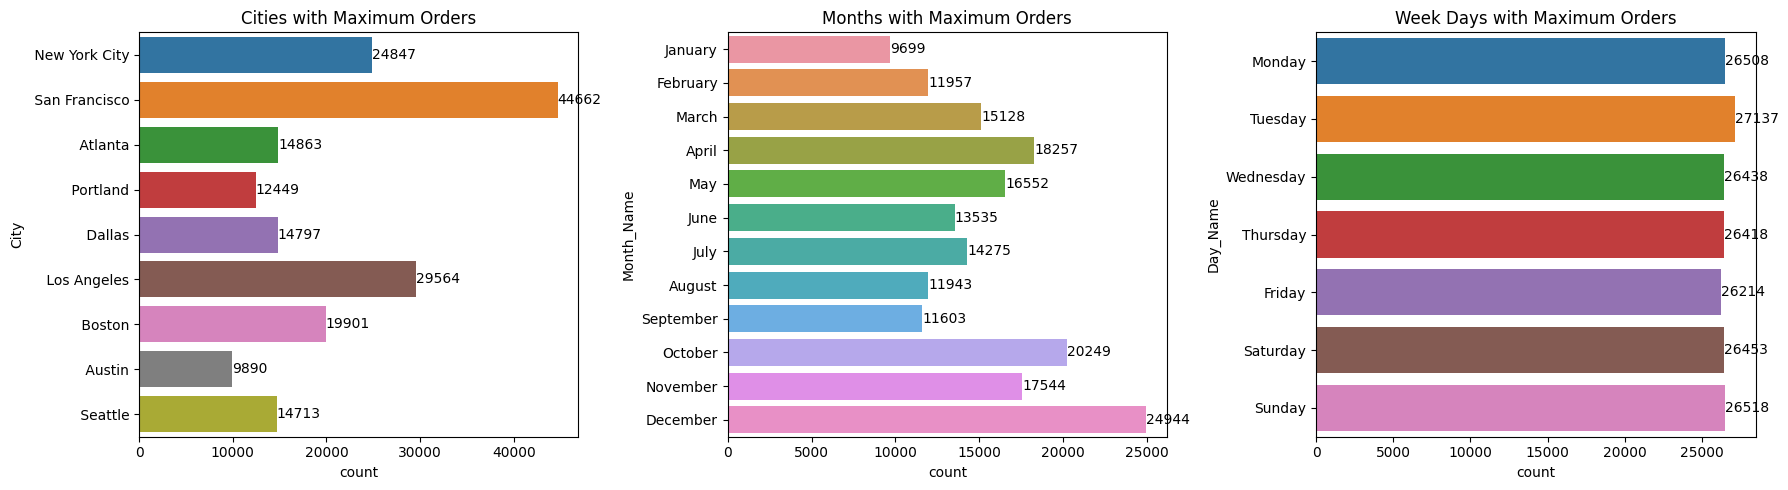

In [30]:
plt.figure(figsize=(18,5))

# Cities with Maximum Orders
ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(data=data, y='City', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title("Cities with Maximum Orders")

# Months with Maximum Orders
ax2 = plt.subplot2grid((1,3),(0,1))

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sns.countplot(data=data, y='Month_Name', ax=ax2, order=order)
for i in ax2.containers:
    plt.bar_label(i)
plt.title("Months with Maximum Orders")

# Week Days with Maximum Orders
ax3 = plt.subplot2grid((1,3),(0,2))

order = ['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=data, y='Day_Name', ax=ax3, order=order, palette=sns.color_palette(n_colors=11))
for i in ax3.containers:
    plt.bar_label(i)
plt.title("Week Days with Maximum Orders")

plt.tight_layout()
plt.show()

In [28]:
# which date of month has recorded maximum number of orders across all data?
data['Day'].value_counts().sort_values(ascending=False)

13    6291
10    6241
2     6187
19    6184
17    6165
26    6150
20    6144
24    6141
18    6132
14    6126
16    6109
27    6108
15    6106
22    6101
9     6100
28    6093
12    6086
21    6085
6     6081
8     6065
11    6060
4     6058
25    6054
1     6042
23    6041
7     6025
5     6015
3     5815
29    5709
30    5623
31    3549
Name: Day, dtype: int64

In [29]:
# What time of the day has recorded maximum number of orders?
data['Hour'].value_counts().sort_values(ascending=False)

19    12886
12    12573
11    12392
18    12263
20    12218
13    12115
14    10965
10    10929
21    10905
17    10884
16    10359
15    10159
22     8808
9      8740
23     6262
8      6252
7      4002
0      3902
6      2481
1      2347
5      1320
2      1242
4       852
3       830
Name: Hour, dtype: int64